In [ ]:
# Fraud-Detection-In-Transaction_EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading Datasets
df = pd.read_csv('./data/synthetic_fraud_dataset.csv')
print("Dataset Uploaded Sucessfully")

Dataset Uploaded Sucessfully


Basic Operations on Datasets

In [5]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [5]:
print("Dataset Shape : ",df.shape)

Dataset Shape :  (50000, 21)


In [6]:
print("\n Info: ")
df.info()


 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float

In [7]:
print("\n Summary Stats: ")
df.describe()


 Summary Stats: 


,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [9]:
print("Columns: ")
df.columns

Columns: 


Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [14]:
# Analyzing Null Values
print("Null Values : ")
df.isnull().sum()

Null Values : 


Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


Fraud Class Distribution:
 Fraud_Label
0    33933
1    16067
Name: count, dtype: int64


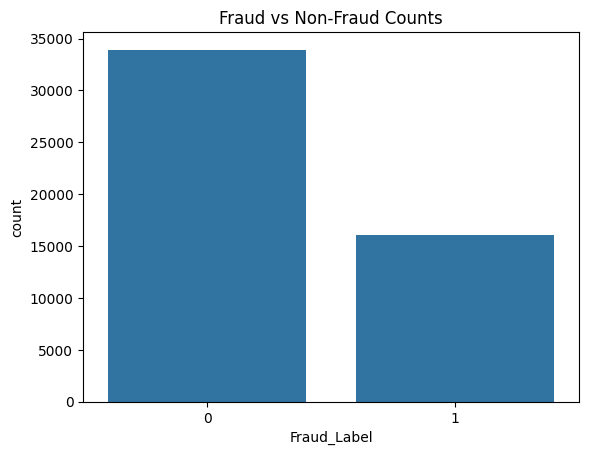

In [16]:
# Check class balance
print("\nFraud Class Distribution:\n", df['Fraud_Label'].value_counts())
sns.countplot(x='Fraud_Label', data=df)
plt.title("Fraud vs Non-Fraud Counts")
plt.show()

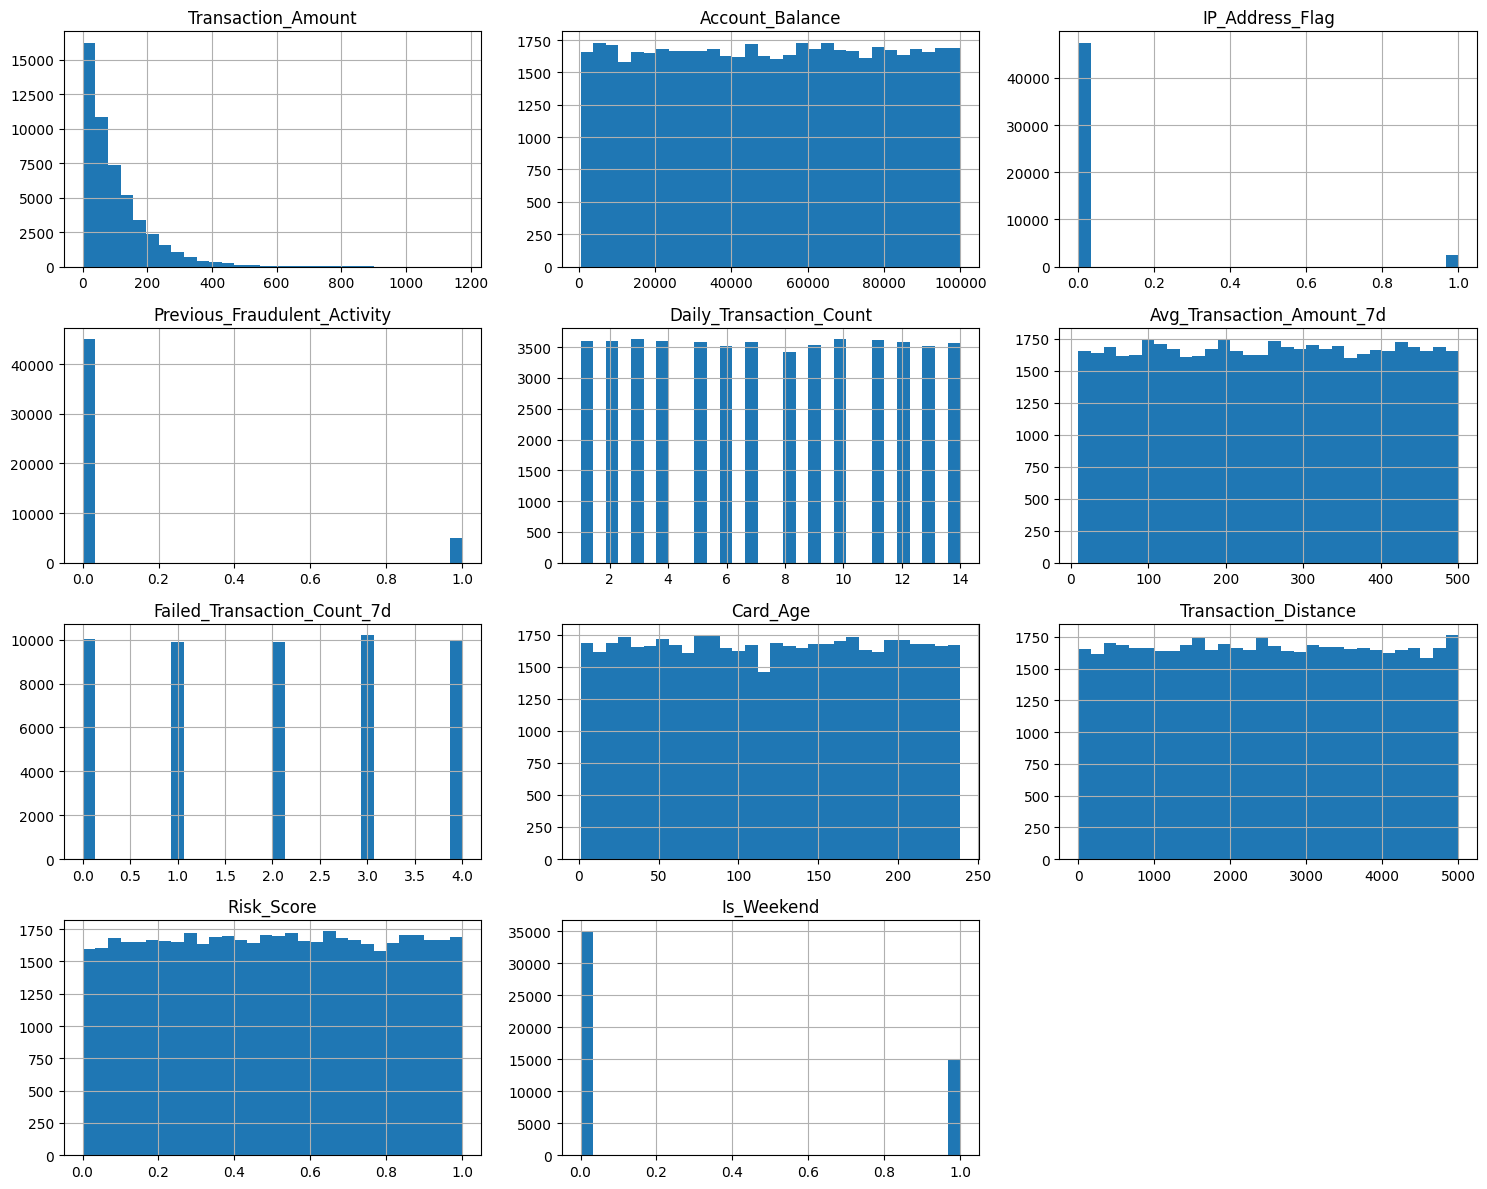

In [17]:
# Visualize numerical feature distributions
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Fraud_Label'])
df[num_cols].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

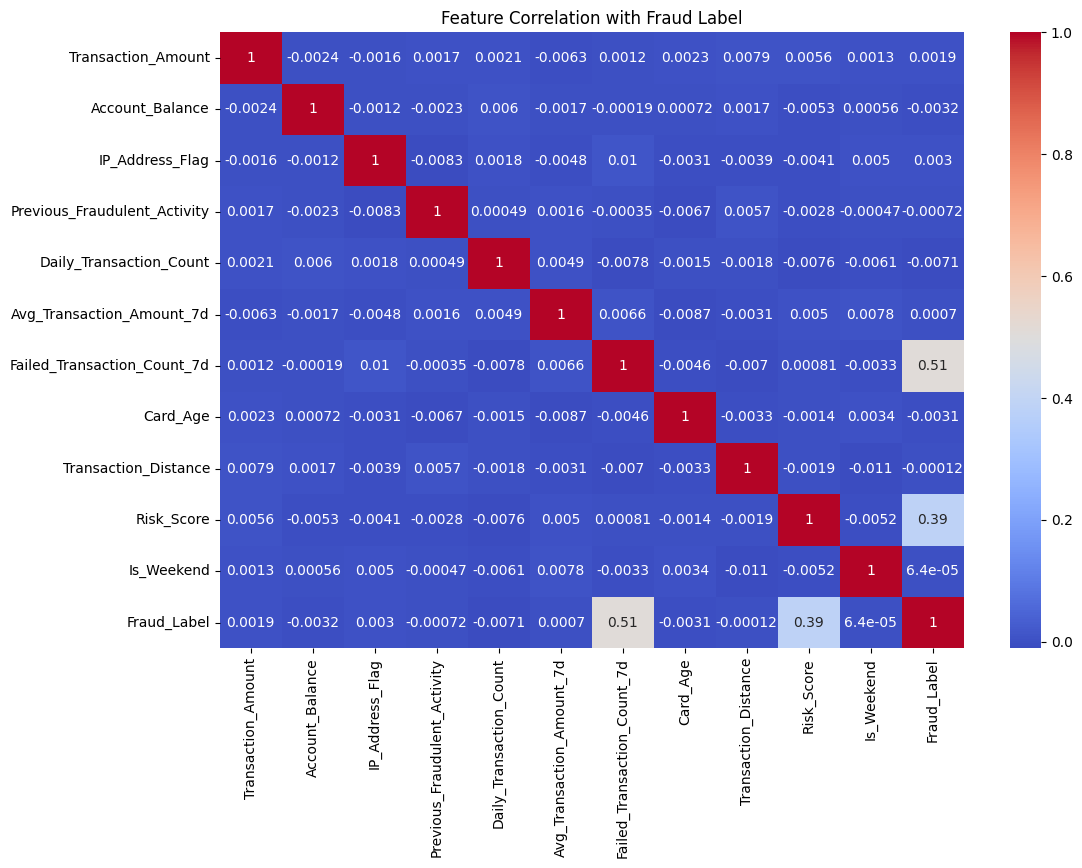

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols.tolist() + ['Fraud_Label']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Fraud Label")
plt.show()

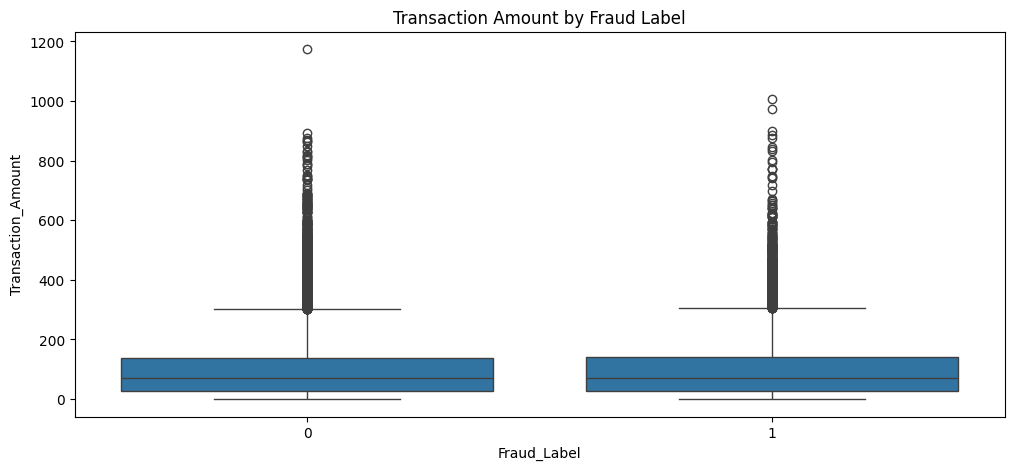

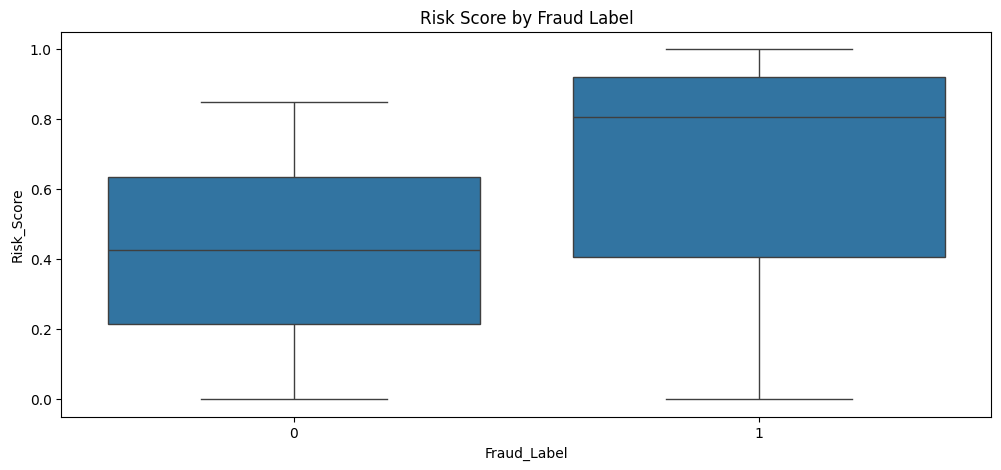

In [19]:
# Boxplots for key features
plt.figure(figsize=(12, 5))
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=df)
plt.title("Transaction Amount by Fraud Label")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='Fraud_Label', y='Risk_Score', data=df)
plt.title("Risk Score by Fraud Label")
plt.show()

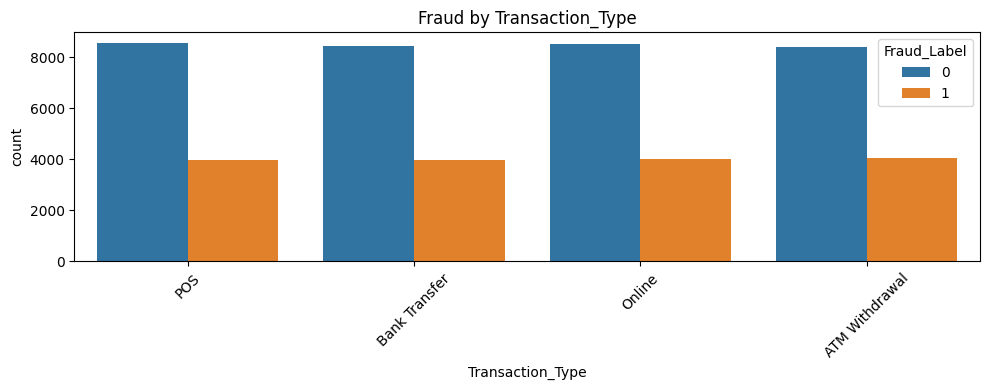

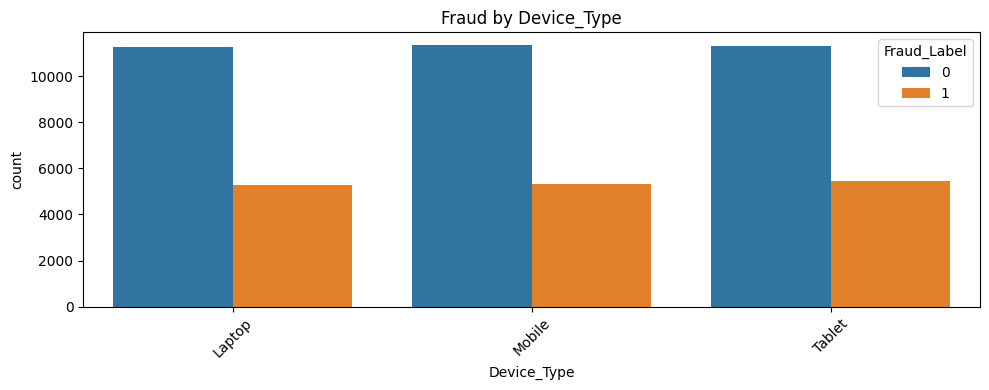

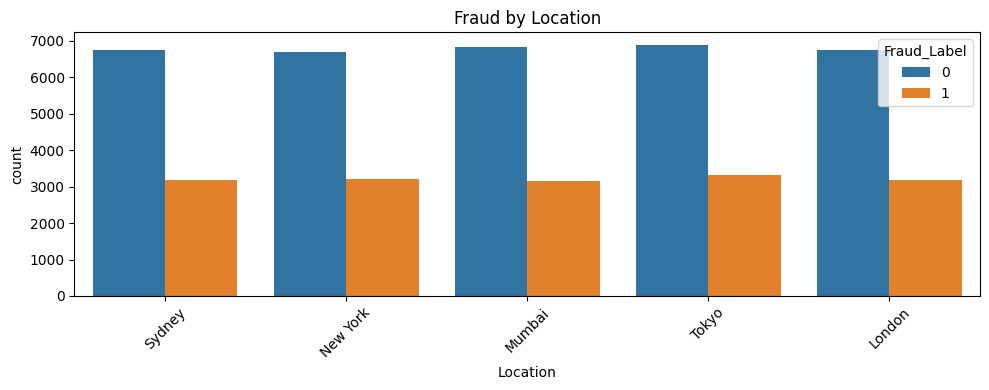

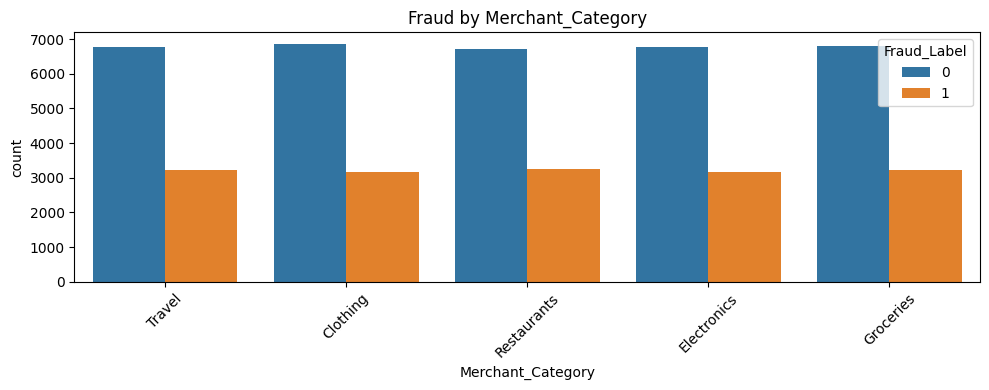

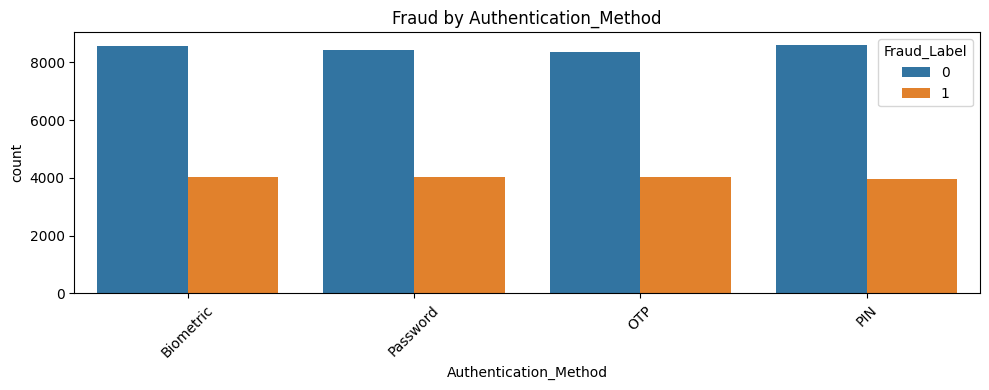

In [17]:
# Categorical analysis
categoricals = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Authentication_Method']
for col in categoricals:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Fraud_Label', data=df)
    plt.title(f"Fraud by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# print("\nEDA completed.")

Analysis with distplot(), histplot()

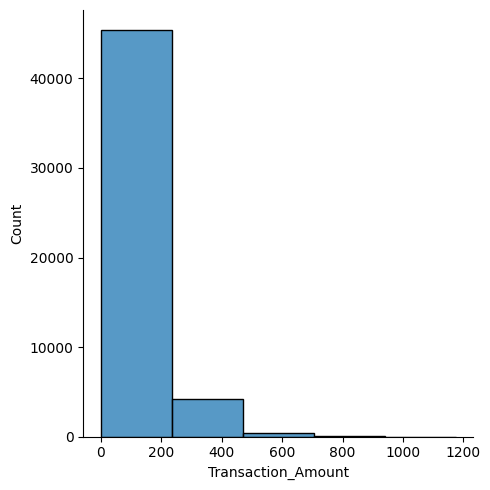

In [16]:
sns.displot(df['Transaction_Amount'], bins=5)

C:\Users\hp\AppData\Local\Temp\ipykernel_18380\1897999879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Previous_Fraudulent_Activity'], bins=5)


<Axes: xlabel='Previous_Fraudulent_Activity', ylabel='Density'>

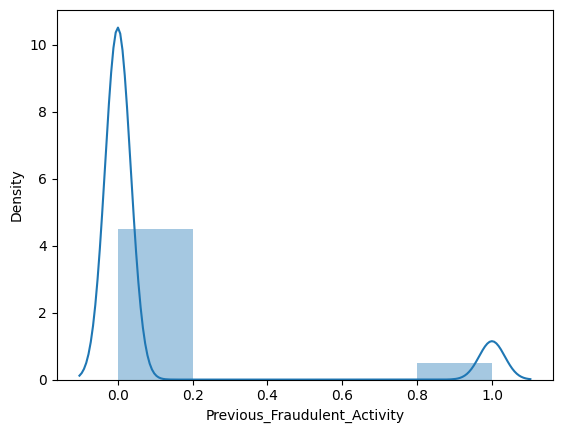

In [43]:
sns.distplot(df['Previous_Fraudulent_Activity'], bins=5)

<Axes: xlabel='Daily_Transaction_Count', ylabel='Count'>

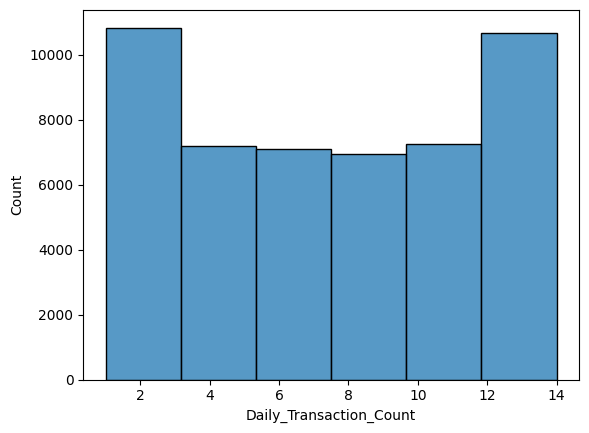

In [73]:
sns.histplot(df['Daily_Transaction_Count'], bins=6)

Outlier Analysis with boxplot

<Axes: ylabel='Transaction_Amount'>

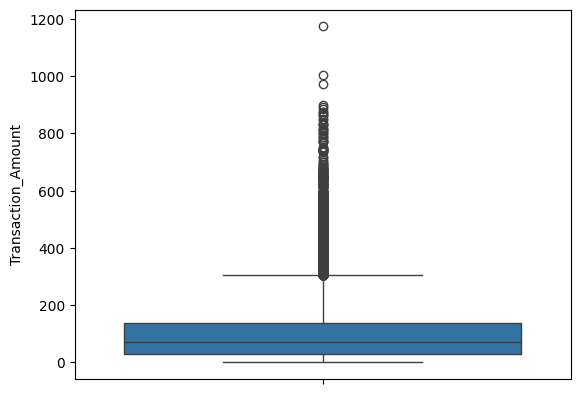

In [ ]:
sns.boxplot(df['Transaction_Amount'])

<Axes: ylabel='Location'>

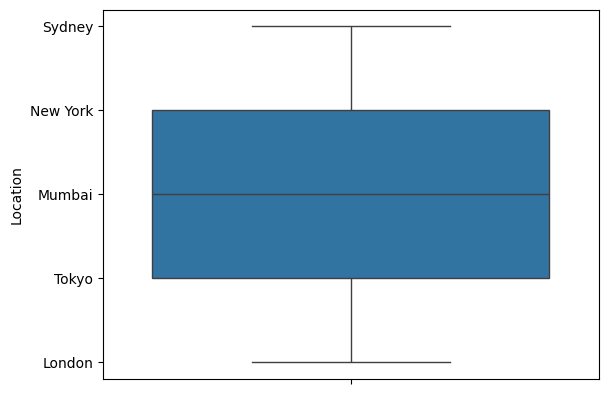

In [100]:
sns.boxplot(df['Location'])

<Axes: ylabel='Merchant_Category'>

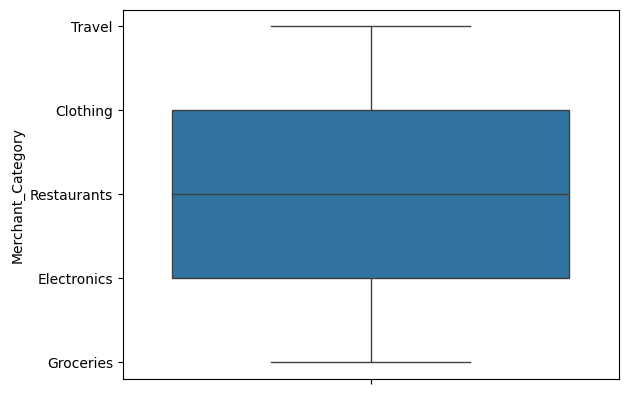

In [101]:
sns.boxplot(df['Merchant_Category'])

<Axes: ylabel='Daily_Transaction_Count'>

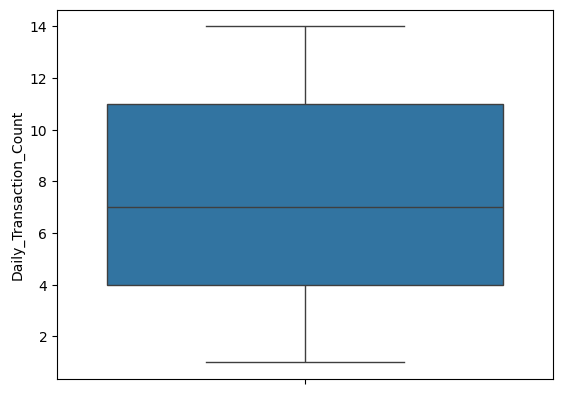

In [103]:
sns.boxplot(df['Daily_Transaction_Count'])

<Axes: ylabel='Avg_Transaction_Amount_7d'>

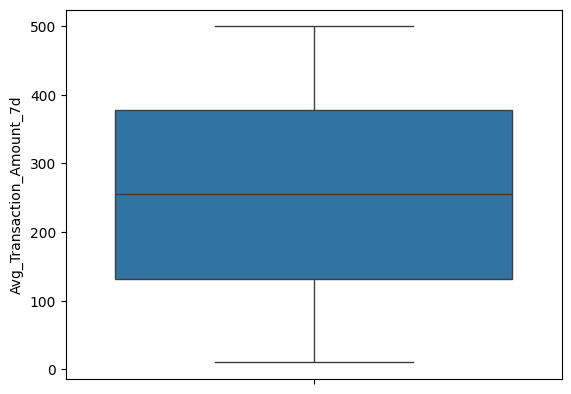

In [104]:
sns.boxplot(df['Avg_Transaction_Amount_7d'])

<Axes: ylabel='Failed_Transaction_Count_7d'>

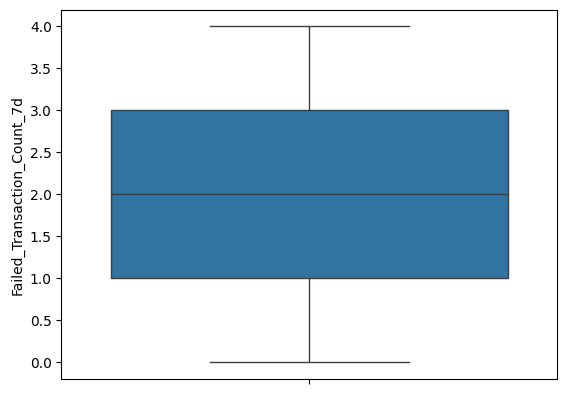

In [105]:
sns.boxplot(df['Failed_Transaction_Count_7d'])

<Axes: ylabel='Card_Type'>

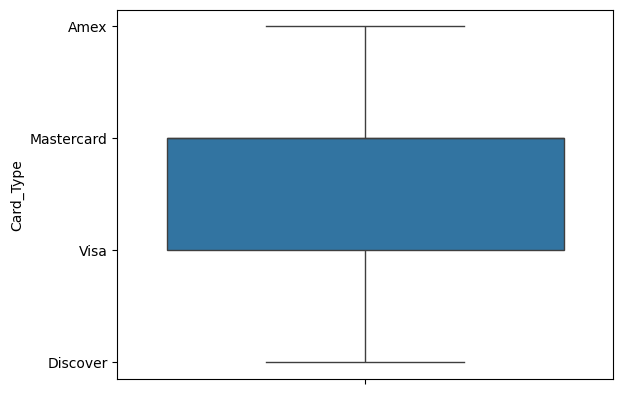

In [106]:
sns.boxplot(df['Card_Type'])

EDA Ends.